# ISM Lecture 8 week 09 Part 3 Solutions

This content is authored by Maria Boutchkova for use in the University of Edinbugh Business School Investment and Securities Markets course in Autumn 2020.

Make sure to have watched the videos preceeding this Notebook and have covered the slides. Detailed explanations in the assigned textbook chapters.

This lesson covers:

* Fama-MacBeth test of CAPM as in BKM chapter 13 section 1 performed on individual assets instead of test portfolios.

The first computational cell below (with In [ ] in front) contains the solution. Go over the command lines, make sure they make sense to you, click inside the cell, it should become surrounded by a green rectangle, press Esc - the rectangle will become blue, now press Shift+Enter - this will execute the cell and produce the results beneath it.

To remove all output in the notebook and start again, go to the Kernel tab above, select Restart and Clear Output.

In this notebook we use the functionality of Stata. If you want to explore its full documetation, see here: https://www.stata.com/bookstore/getting-started-windows/

The comment sign in Stata is * not #

In [1]:
* again import the data we prepared in python
import delimited data.csv, varnames(1) clear

(78 vars, 311 obs)


In [2]:
%browse

,date,snp,amexlng,asxalx,asxqub,asxsyd,asxtcl,bitat,bitatl,bitenav,bitenel,bmeaena,bmeibe,enxtamvpk,enxtpaadp,enxtpaengi,enxtpaget,enxtpagtt,lseng,lsesig,nyseasr,nyseawk,nysed,nyseduk,nyseebr,nyseed,nyseenia,nysees,nyseetrn,nysefe,nysekmi,nysemic,nysenee,nyseoke,nysepac,nysepeg,nyseppl,nysesbs,nyseso,nysesre,nysetrgp,nyseugp,nysewec,nysewmb,nzseaia,nasdaqgsaep,nasdaqgsexc,nasdaqgsomab,nasdaqgsxel,sehk1052,sehk1193,sehk1199,sehk135,sehk144,sehk152,sehk177,sehk1816,sehk270,sehk357,sehk371,sehk384,sehk548,sehk576,sehk694,sehk836,sgxns8u,swxfhzn,tsxenb,tsxgei,tsxipl,tsxkey,tsxppl,tsxtrp,tsxwte,xtraeoan,xtrafra,xtrahhfa,xtrarwe
1,31-Dec-94,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
2,31-Jan-95,.019776287,-.0048583332,.,.,.,.,-.060071774,.,.,.,.,-.040966749,.,.,.,.,.,.,-.077178545,.,.,.054169506,.054158103,.,.092228986,-.13999346,.099187918,.,.,.,.,.037846111,-.017053388,.,.080047205,.074089035,.,.054367919,.,.,.,.077267133,.069768518,.,.059780482,.086978599,.,.046278019,.,-.30485806,-.18410365,-.21278548,.,.08085566,.,.,-.15518479,.,-.088190801,.,.,.,.,.,.,.010179268,-.044332068,.,.,.,.,.017039608,.,-.049340166,.,.,-.039269943
3,28-Feb-95,.03125748,-.0048166667,.,.,.,.,-.043976631,.,.,.,.,.038626052,.,.,.,.,.,.,-.0048166667,.,.,.0087209186,-.020390825,-.33357066,-.0091229184,-.03096538,-.033656444,.,.,.,.,-.01346565,-.019102462,.,.0082268342,.0073784553,.,-.016792789,.,.,.,-.00093544257,.070137203,.,-.020438507,.010483517,.,-.026438314,.,-.033393823,.029667027,.1264438,.,.35483295,.,.,.087490581,.,.24518326,.,.,.,.,.,.,-.060372237,.082588397,.,.,.,.,.045183208,.,.033912856,.,.,.1341863
4,31-Mar-95,.022579243,-.0047499998,.,.,.,.,-.067561761,.,.,.,.,-.10242537,.,.,.,.,.,.,.061408024,.,.,-.057381563,-.030227719,-.12579226,-.018324567,.059766203,-.070684068,.,.,.,.,.0091871778,.089453027,.,-.04707972,-.039304804,.,-.016871288,.,.,.,-.027272483,.060467243,.,-.067480683,-.065497503,.,-.03237427,.,-.18122059,.2285829,-.065523215,.,.075895019,.,.,.051588133,.,-.095659308,.,.,.,.,.,.,-.083181411,.029437767,.,.,.,.,-.018815007,.,-.037210062,.,.,-.022099506
5,30-Apr-95,.023501538,-.0047583333,.,.,.,.,.029676503,.,.,.,.,.10453122,.,.,.,.,.,.,.067036889,.,.,.0091305058,.027921421,.40446958,.01359025,.1396542,.018771078,.,.,.,.,.0055513987,.023541192,.,-.00019223364,-.068452589,.,.022520982,.,.,.,.018283101,.068711132,.,.026737778,.020117236,.,.016238347,.,.06667351,-.033732109,-.057707593,.047415342,-.12416124,.,.,-.051424958,.,-.024757577,.,.,.,.,.,.,.0080076139,-.00062640838,.,.,.,.,.0022346822,.,.026914129,.,.,.02194109
6,31-May-95,.031309791,-.0046999999,.,.,.,.,.034149081,.,.,.,.,.058055378,.,.,.,.,.,.,.13884036,.,.,.030407062,.065287948,.033058815,.091405399,.031470496,.1146501,.,.,.,.,.076269373,-.011235867,.,.077118158,.04291923,.,.068027355,.,.,.,.049433295,.038052108,.,.060695011,.10408819,.,.065921485,.,.017520117,.08875747,-.023325797,.040792044,-.072496891,.,.,.17711823,.,-.065924309,.,.,.,.,.,.,.054123599,.011438657,.,.,.,.,.0022444529,.,.05835788,.,.,.01516644
7,30-Jun-95,.016736923,-.0045416667,.,.,.,.,-.056114215,.,.,.,.,.070633546,.,.,.,.,.,.,-.00035796422,.,.,-.021376733,-.010529667,-.051164523,-.017093958,.017103391,-.062133286,.,.,.,.,-.020465206,.12045825,.,-.054524403,.030321432,.,.0067578224,.,.,.,-.034844719,.021194035,.,.021005772,-.022319561,.,-.030926814,.,-.026278783,.12366387,.084057614,.11410275,.050003853,.,.,.0070191142,.,-.0045416667,.,.,.,.,.,.,.099192791,.0037920806,.,.,.,.,.02323471,.,.0099942777,.,.,.0047222674
8,31-Jul-95,.027251044,-.0045250002,.,.,.,.,.021879874,.,.,.,.,.10098054,.,.,.,.,.,.,.12880883,.,.,-.02849764,-.0045250002,-.011563784,-.021474101,-.13588092,-.0045250002,.,.,.,.,-.014233819,.096673317,.,-.0045250002,-.017345626,.,-.021284856,.,.,.,-.0045250002,.056406606,.,-.022318589,.031674143,.,-.030809205,.,.5176959,.17729245,-.01033989,.12426374,-.073490143,.,.,.084232338,.,-.00452500

# Solved Problem 1: Multiple time-series regressions in a loop

Now we are going to loop over all stocks, regress each of them on the market return and save three outputs from each regression: alpha, beta and the root MSE.

In [3]:
* first we shall save all variable names of the stocks without snp in a local macro using the convenient command in stata unab
unab stocks: amexlng - xtrarwe
* check to see if the what we want is saved in the local macro stocks
di "`stocks'"



amexlng asxalx asxqub asxsyd asxtcl bitat bitatl bitenav bitenel bmeaena bmeibe 
> enxtamvpk enxtpaadp enxtpaengi enxtpaget enxtpagtt lseng lsesig nyseasr nyseaw
> k nysed nyseduk nyseebr nyseed nyseenia nysees nyseetrn nysefe nysekmi nysemic
>  nysenee nyseoke nysepac nysepeg nyseppl nysesbs nyseso nysesre nysetrgp nyseu
> gp nysewec nysewmb nzseaia nasdaqgsaep nasdaqgsexc nasdaqgsomab nasdaqgsxel se
> hk1052 sehk1193 sehk1199 sehk135 sehk144 sehk152 sehk177 sehk1816 sehk270 sehk
> 357 sehk371 sehk384 sehk548 sehk576 sehk694 sehk836 sgxns8u swxfhzn tsxenb tsx
> gei tsxipl tsxkey tsxppl tsxtrp tsxwte xtraeoan xtrafra xtrahhfa xtrarwe


In [4]:
%help unab

This front-end cannot display HTML help.

In [5]:
* now we shall run all the regressions and save the 3 numbers in the last 3 lines below the data

* add 3 more empty observations
* in Stata the total number of observations in a dataset in memory is _N
local new_obs = _N + 3
set obs `new_obs'



number of observations (_N) was 311, now 314


In [6]:
* set up the loop
foreach v of local stocks {
    qui reg `v' snp
    qui replace `v' = _b[_cons] in -3
    qui replace `v' = _b[snp] in -2
    qui replace `v' = e(rmse) in -1
}

In [7]:
%tail

,date,snp,amexlng,asxalx,asxqub,asxsyd,asxtcl,bitat,bitatl,bitenav,bitenel,bmeaena,bmeibe,enxtamvpk,enxtpaadp,enxtpaengi,enxtpaget,enxtpagtt,lseng,lsesig,nyseasr,nyseawk,nysed,nyseduk,nyseebr,nyseed,nyseenia,nysees,nyseetrn,nysefe,nysekmi,nysemic,nysenee,nyseoke,nysepac,nysepeg,nyseppl,nysesbs,nyseso,nysesre,nysetrgp,nyseugp,nysewec,nysewmb,nzseaia,nasdaqgsaep,nasdaqgsexc,nasdaqgsomab,nasdaqgsxel,sehk1052,sehk1193,sehk1199,sehk135,sehk144,sehk152,sehk177,sehk1816,sehk270,sehk357,sehk371,sehk384,sehk548,sehk576,sehk694,sehk836,sgxns8u,swxfhzn,tsxenb,tsxgei,tsxipl,tsxkey,tsxppl,tsxtrp,tsxwte,xtraeoan,xtrafra,xtrahhfa,xtrarwe
305,30-Apr-20,.12674898,.39363635,.13420624,.02781195,.1269176,.14608441,.11379737,.29955503,.01934671,-.016343523,.16047575,.017269276,.13433735,.022203457,.052178692,.05813976,-.0120353,-.013617101,.18626864,.059072196,.017720327,.068335533,.046640903,-.032632899,.0101614,.3348884,.031742364,.66590899,.029852603,.094014198,.09257827,-.039576355,.41760686,.14933029,.12905216,.029888825,.037845314,.047743943,.096019693,.89092231,.09867043,.027364435,.36880955,.22034588,.039039787,.0072399485,.077856004,.053968016,.14366831,.12298194,.10418326,.11469533,.12857322,.046383873,.069269121,.089792721,.078887664,.20963144,-.0099961516,.061016109,.11762659,.079534583,.056585252,.076017387,.26203626,.092565551,.040656589,.22021268,.38768598,.59318507,.21821554,.024045691,.14057778,-.03134165,.084999852,.1706367,.095063627
306,31-May-20,.057683252,-.050252799,.065465093,.27212709,-.071563572,.03537222,.039190844,-.017637525,.05032168,.10650376,.10982171,.059821166,-.063038841,.047404151,.073673561,.1159441,.0059072967,-.0084879296,.19015874,.039580174,.048386399,.10203017,.023130959,.20165856,-.03745861,-.028429823,.044468455,-.016294202,.033525325,.055485491,.028861012,.10561094,.22572534,.070994034,.0063725957,.09899953,.34463942,.017756941,.01972774,.38026628,.19087623,.020490242,.054588817,.067188479,.034805316,.044232458,.21370797,.022992756,-.046345796,-.018020105,-.023784693,-.059540849,-.057135019,-.055672877,-.013108011,-.039499987,-.05348492,.1556439,-.023468133,-.05423623,-.11225279,-.00017151242,-.074847609,-.022985935,-.11551619,.10985661,.069479108,.073995136,.086797491,.064125419,.083975911,-.031511836,-.019571941,.088822491,.11425062,-.018952144,.13515463
307,30-Jun-20,.00619329,.089391053,-.006130117,.073676601,-.030893432,-.00028040551,.09933529,-.020336568,-.016790833,.11246824,-.074227132,.065111205,-.045348261,-.024149794,.034196474,-.010909991,.043152466,.068126336,-.0048451968,.083024286,.012946703,-.034683768,-.067156754,.057711679,-.041824128,.012005214,-.0052615632,.027069964,-.082471542,-.039997574,.080890276,-.055168238,-.094700336,.081339471,-.028051598,-.062591046,.047732264,-.091590784,-.063860215,.12173162,.065913573,-.044602524,-.050275393,.010645065,-.06593062,-.052851915,.053776544,-.032636859,.092805125,-.10663304,.074811243,.12156478,.03092533,-.046492018,.05038581,-.10124777,-.10337852,.18031062,.056426555,-.11820535,.074500427,.0053804205,.03815138,.05331048,-.16534029,-.068959266,-.078284062,.0084201219,.0054962239,-.045827281,-.0074837478,-.051955495,.15304506,.053420961,-.13011073,.032752533,.071417034
308,31-Jul-20,.055025361,.023927456,-.0031003635,-.061934896,-.077680506,-.022726018,-.1161067,-.059519727,-.13617089,.02703975,-.070845805,.076736443,-.01558469,-.12480564,.026284469,-.0086461445,.15235087,-.059475999,.013288665,-.11104185,.14456563,-.0019269169,.060629304,.29798093,.068042606,.0079101808,.081582896,.16117229,-.252271,-.053256936,-.023865417,.1686763,-.13197222,-.065938257,.13783784,.030106572,.099825688,.053151317,.061594471,-.084480815,.061867736,.086743422,.0057042325,-.028998498,.090829916,.063850299,-.1047898,.10456084,-.090652183,.011841358,-.028925229,.29075748,-.031738609,.024232017,-.084880926,.018670833,-.058725826,3.3277292,.089324787,-.02518375,-.057477124,.051015723,.05352908,.084443353,.12492083,-.06587933,.038438298,.043934129,-.0040771845,-.0075

# Solved Problem 2: Compute averages and save in the last row

We are again going to loop over all stocks, including the mkt return and compute their means and store them in the bottom of the data.

In [8]:
local new_obs = _N + 1
set obs `new_obs'



number of observations (_N) was 314, now 315


In [9]:
* set up the loop, this time we want all variables no need to exclude snp
* the option meanonly speeds up the code and works for us since we only need the mean
unab stocks: snp - xtrarwe
foreach v of local stocks {
    qui sum `v', meanonly
    qui replace `v' = r(mean) in -1
}

In [10]:
%tail

,date,snp,amexlng,asxalx,asxqub,asxsyd,asxtcl,bitat,bitatl,bitenav,bitenel,bmeaena,bmeibe,enxtamvpk,enxtpaadp,enxtpaengi,enxtpaget,enxtpagtt,lseng,lsesig,nyseasr,nyseawk,nysed,nyseduk,nyseebr,nyseed,nyseenia,nysees,nyseetrn,nysefe,nysekmi,nysemic,nysenee,nyseoke,nysepac,nysepeg,nyseppl,nysesbs,nyseso,nysesre,nysetrgp,nyseugp,nysewec,nysewmb,nzseaia,nasdaqgsaep,nasdaqgsexc,nasdaqgsomab,nasdaqgsxel,sehk1052,sehk1193,sehk1199,sehk135,sehk144,sehk152,sehk177,sehk1816,sehk270,sehk357,sehk371,sehk384,sehk548,sehk576,sehk694,sehk836,sgxns8u,swxfhzn,tsxenb,tsxgei,tsxipl,tsxkey,tsxppl,tsxtrp,tsxwte,xtraeoan,xtrafra,xtrahhfa,xtrarwe
306,31-May-20,.057683252,-.050252799,.065465093,.27212709,-.071563572,.03537222,.039190844,-.017637525,.05032168,.10650376,.10982171,.059821166,-.063038841,.047404151,.073673561,.1159441,.0059072967,-.0084879296,.19015874,.039580174,.048386399,.10203017,.023130959,.20165856,-.03745861,-.028429823,.044468455,-.016294202,.033525325,.055485491,.028861012,.10561094,.22572534,.070994034,.0063725957,.09899953,.34463942,.017756941,.01972774,.38026628,.19087623,.020490242,.054588817,.067188479,.034805316,.044232458,.21370797,.022992756,-.046345796,-.018020105,-.023784693,-.059540849,-.057135019,-.055672877,-.013108011,-.039499987,-.05348492,.1556439,-.023468133,-.05423623,-.11225279,-.00017151242,-.074847609,-.022985935,-.11551619,.10985661,.069479108,.073995136,.086797491,.064125419,.083975911,-.031511836,-.019571941,.088822491,.11425062,-.018952144,.13515463
307,30-Jun-20,.00619329,.089391053,-.006130117,.073676601,-.030893432,-.00028040551,.09933529,-.020336568,-.016790833,.11246824,-.074227132,.065111205,-.045348261,-.024149794,.034196474,-.010909991,.043152466,.068126336,-.0048451968,.083024286,.012946703,-.034683768,-.067156754,.057711679,-.041824128,.012005214,-.0052615632,.027069964,-.082471542,-.039997574,.080890276,-.055168238,-.094700336,.081339471,-.028051598,-.062591046,.047732264,-.091590784,-.063860215,.12173162,.065913573,-.044602524,-.050275393,.010645065,-.06593062,-.052851915,.053776544,-.032636859,.092805125,-.10663304,.074811243,.12156478,.03092533,-.046492018,.05038581,-.10124777,-.10337852,.18031062,.056426555,-.11820535,.074500427,.0053804205,.03815138,.05331048,-.16534029,-.068959266,-.078284062,.0084201219,.0054962239,-.045827281,-.0074837478,-.051955495,.15304506,.053420961,-.13011073,.032752533,.071417034
308,31-Jul-20,.055025361,.023927456,-.0031003635,-.061934896,-.077680506,-.022726018,-.1161067,-.059519727,-.13617089,.02703975,-.070845805,.076736443,-.01558469,-.12480564,.026284469,-.0086461445,.15235087,-.059475999,.013288665,-.11104185,.14456563,-.0019269169,.060629304,.29798093,.068042606,.0079101808,.081582896,.16117229,-.252271,-.053256936,-.023865417,.1686763,-.13197222,-.065938257,.13783784,.030106572,.099825688,.053151317,.061594471,-.084480815,.061867736,.086743422,.0057042325,-.028998498,.090829916,.063850299,-.1047898,.10456084,-.090652183,.011841358,-.028925229,.29075748,-.031738609,.024232017,-.084880926,.018670833,-.058725826,3.3277292,.089324787,-.02518375,-.057477124,.051015723,.05352908,.084443353,.12492083,-.06587933,.038438298,.043934129,-.0040771845,-.0075648166,-.03511548,.052507047,.028646164,-.0079673342,-.14948669,-.02660439,.027886117
309,31-Aug-20,.069978476,.051856011,-.015235773,.0035790049,.1216954,-.02542812,-.05125213,-.0090060998,.015495753,-.018197766,.13409534,-.033966951,-.0072039077,.097415835,.032245327,.0085568391,.0082225436,-.063611485,.12332009,.13644794,-.036797211,-.032047641,-.041031823,-.083093733,-.061895221,-.060850348,-.048490968,.082021065,-.00075498468,-.019942289,-.064837173,-.00051908148,-.015490843,.15478243,-.066226467,.03785722,-.24748901,-.033334106,-.0065922863,-.069558971,-.022306388,-.0056546209,.085122317,.039100785,-.085239336,-.034571365,.096127503,.0062165223,-.065124817,-.047204565,.086549319,-.10810886,-.00008416667,-.015906952,-.066269487,.030590679,-.033630431,-.042637359,-.073032305,-.072240248,-.050151825,-.092098057

# Solved Problem 3: Run the second-pass regression and plot the results

We are now ready to regress the average return on the betas, betas squared and the root MSE of all time-series regressions. But first we need to rearange the last 4 rows of the data into columns

In [11]:
drop date
keep in -4/l
xpose, clear
rename v1 alpha
rename v2 beta
rename v3 rmse
rename v4 ave



(311 observations deleted)







In [12]:
%browse

,alpha,beta,rmse,ave
1,.,.,.,.0055152918
2,.016986053,.98541093,.23079029,.026145881
3,.01146243,.89464015,.071355693,.026322041
4,.0041693388,.94036973,.070632279,.015161418
5,.011061931,.79170948,.074722327,.019552995
6,.011261406,.26618993,.063845061,.01357085
7,.012676314,.71160853,.095402971,.019060738
8,.0013385603,.86299253,.065830901,.010668921
9,-.0032957557,.54955322,.058252864,.012304935
10,.0032085581,.51420927,.053460591,.0070245522


In [13]:
* save the average mkt excess return in a local macro
qui sum ave in 1, meanonly
local ave_mkt = r(mean)
drop in 1
gen beta_sq = beta*beta
reg ave beta beta_sq rmse
di "`ave_mkt'"




(1 observation deleted)



      Source |       SS           df       MS      Number of obs   =        76
-------------+----------------------------------   F(3, 72)        =     64.60
       Model |  .007336067         3  .002445356   Prob > F        =    0.0000
    Residual |  .002725534        72  .000037855   R-squared       =    0.7291
-------------+----------------------------------   Adj R-squared   =    0.7178
       Total |  .010061601        75  .000134155   Root MSE        =    .00615

------------------------------------------------------------------------------
         ave |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        beta |   -.011888   .0044993    -2.64   0.010    -.0208572   -.0029188
     beta_sq |   .0104361   .0018987     5.50   0.000     .0066511    .0142211
        rmse |   .1067802   .0120288     8.88   0.000     .0828012    .1307593
       _cons |   .006

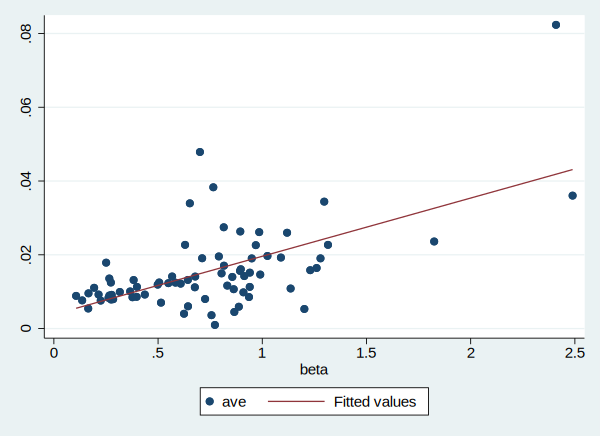

In [14]:
* plot the data and the linear fit of ave on beta
scatter ave beta || lfit ave beta 

# Practice Problem: Perform all thse steps for your own data

Now perform these same steps for your data that you saved in part 1 in the csv file my_data.

In [15]:
import delimited my_data.csv, varnames(1) clear

(112 vars, 311 obs)


In [16]:
%browse

,date,snp,nyseaig,nyseanet,nyseavy,nyseaxp,nysebkr,nyseblk,nysecah,nysecarr,nysecb,nysecbre,nysecfg,nyseci,nysecnp,nysecof,nysectva,nysecvs,nysedal,nysedfs,nysedis,nysedri,nysedte,nyseess,nysef,nysefcx,nysege,nysegm,nysehca,nysehes,nysehig,nysehlt,nysehon,nyseinfo,nyseip,nyseir,nyseit,nysejpm,nysekey,nysekeys,nysel,nyseluv,nyselvs,nysemck,nysemet,nysempc,nysems,nysemsci,nysemtb,nysemtd,nyseoke,nyseoxy,nysepayc,nyseph,nysepkg,nysere,nyserf,nyserjf,nysermd,nyseschw,nyseslb,nysesnap,nysetap,nysetdg,nysetdy,nysetfc,nysetrv,nysett,nysetyl,nyseuber,nyseuhs,nyseusb,nysevlo,nysewat,nysewell,nysey,nysezen,nasdaqcmexas,nasdaqgmttd,nasdaqgsacgl,nasdaqgsadi,nasdaqgsadp,nasdaqgsalgn,nasdaqgsamat,nasdaqgsbkng,nasdaqgscdw,nasdaqgscsx,nasdaqgsexc,nasdaqgsexpe,nasdaqgsfitb,nasdaqgsgoog,nasdaqgsgoogl,nasdaqgsgrmn,nasdaqgshban,nasdaqgshsic,nasdaqgshst,nasdaqgsidxx,nasdaqgsklac,nasdaqgslrcx,nasdaqgsmar,nasdaqgsmchp,nasdaqgsmtch,nasdaqgsmu,nasdaqgsmxim,nasdaqgsqcom,nasdaqgssivb,nasdaqgster,nasdaqgstrmb,nasdaqgswynn,nasdaqgsxlnx,nasdaqgsxray,nasdaqgszbra
1,31-Dec-94,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
2,31-Jan-95,.019776287,.057641581,.,-.011900496,.062938616,-.032938268,.,-.010249604,.,.048616696,.,.,.058009535,.11443997,.0068923058,.,.0029681951,.,.,.10292606,.,.,.086050853,-.089966893,.,.0049452777,.,.,-.010337777,.,.,.046612281,.,-.061243042,.,-.017678823,.082250126,.11014158,.,.061324961,.15185858,.,.12540986,.,.,.098462805,.,.077861436,.,-.017053388,-.037325729,.,.033603881,.,.,.,.091475338,.,.14473276,.04228805,.,-.0048583332,.,.,.064866871,.,.0030787159,-.12024286,.,-.045674667,.043250274,.032178849,.,.089659587,.000075882854,.,.,.,.,-.086709127,.0079621347,.,-.0936139,.,.,.023866851,.086978599,.,.042016294,.,.,.,.053112019,.,-.0048583332,-.018747222,.015549725,.00185281,.,-.19122277,.,-.0020254094,-.17628688,.099308193,.018288333,-.045448709,.059535533,.,-.030174561,.1062531,.019142451
3,28-Feb-95,.03125748,-.0073184897,.,.066676699,.062643424,.080289736,.,.068354115,.,.00025976184,.,.,.11533173,-.027121965,.12256099,.,.052093916,.,.,.044323772,.,.,-.027543996,.029836772,.,.058290426,.,.,.075073123,.,.,.060106624,.,.074876718,.,.073105372,.024029363,.049216084,.,.046604153,-.094626501,.,.0019173239,.,.,.073033176,.,.1233006,.,-.019102462,.055586077,.,-.010245887,.,.,.,.15911749,.,.10455903,.079176567,.,-.027204618,.,.,.10012162,.,.0050745173,.125618,.,.059013318,.11321609,.024201825,.,.036118969,.027916482,.,.,.,.,.1637896,.035267767,.,.19323412,.,.,.086936973,.010483517,.,.020059587,.,.,.,.0088819247,.,.13804068,.065605871,.15518339,.061849687,.,.12367494,.,.39631322,.12880281,.098960191,.063058183,.11441408,.0058601815,.,.15319265,-.054817099,-.095442154
4,31-Mar-95,.022579243,-.0011361074,.,.058583379,.03242505,.060609508,.,-.04202671,.,.020101245,.,.,-.0079177404,-.0080179032,.043195795,.,.14140387,.,.,-.0024084207,.,.,.0055038095,.023957904,.,-.011006822,.,.,.0059274919,.,.,.031553637,.,-.022753311,.,.031394616,-.053063825,-.030612174,.,.01198105,.0094335927,.,.09016531,.,.,.01082628,.,.028482605,.,.089453027,.11704469,.,-.058225363,.,.,.,-.027895693,.,.085390367,.043601703,.,.0029423377,.,.,-.11648189,.,.026623081,.18755774,.,.0052497382,-.012926742,.023221925,.,-.021603957,-.0025302223,.,.,.,.,.010175193,.019983046,.,.19037203,.,.,.0081116306,-.065497503,.,.0068804855,.,.,.,-.0072566913,.,.074795462,.087355264,.085767336,.11400053,.,.10911104,.,.22307256,.1055172,.1149073,-.021699153,.13614346,.065673105,.,.0083329054,.042623337,.12239809
5,30-Apr-95,.023501538,.020452069,.,.014050447,-.0018726434,.099536121,.,-.036254801,.,.044745877,.,.,-.03318622,.028028505,.047528692,.,-.034715813,.,.,.032004438,.,.,.018863635,.016051443,.,.032278217,.,.,.020558164,.,.,.0047958507,.,.021908337,.,-.042549059,.10120251,-.057855569,.,.026887033,.28894898,.,-.0233341

In [17]:
* change the below to your own tickers
unab stocks: nyseaig - nasdaqgszbra
* check to see if the what we want is saved in the local macro stocks
di "`stocks'"



nyseaig nyseanet nyseavy nyseaxp nysebkr nyseblk nysecah nysecarr nysecb nysecbr
> e nysecfg nyseci nysecnp nysecof nysectva nysecvs nysedal nysedfs nysedis nyse
> dri nysedte nyseess nysef nysefcx nysege nysegm nysehca nysehes nysehig nysehl
> t nysehon nyseinfo nyseip nyseir nyseit nysejpm nysekey nysekeys nysel nyseluv
>  nyselvs nysemck nysemet nysempc nysems nysemsci nysemtb nysemtd nyseoke nyseo
> xy nysepayc nyseph nysepkg nysere nyserf nyserjf nysermd nyseschw nyseslb nyse
> snap nysetap nysetdg nysetdy nysetfc nysetrv nysett nysetyl nyseuber nyseuhs n
> yseusb nysevlo nysewat nysewell nysey nysezen nasdaqcmexas nasdaqgmttd nasdaqg
> sacgl nasdaqgsadi nasdaqgsadp nasdaqgsalgn nasdaqgsamat nasdaqgsbkng nasdaqgsc
> dw nasdaqgscsx nasdaqgsexc nasdaqgsexpe nasdaqgsfitb nasdaqgsgoog nasdaqgsgoog
> l nasdaqgsgrmn nasdaqgshban nasdaqgshsic nasdaqgshst nasdaqgsidxx nasdaqgsklac
>  nasdaqgslrcx nasdaqgsmar nasdaqgsmchp nasdaqgsmtch nasdaqgsmu nasdaqgsmxim na
> sdaqgsqcom nasdaqgssivb 

In [18]:
* add 3 more empty observations
local new_obs = _N + 3
set obs `new_obs'



number of observations (_N) was 311, now 314


In [19]:
* set up the loop
foreach v of local stocks {
    qui reg `v' snp
    qui replace `v' = _b[_cons] in -3
    qui replace `v' = _b[snp] in -2
    qui replace `v' = e(rmse) in -1
}

In [20]:
%tail

,date,snp,nyseaig,nyseanet,nyseavy,nyseaxp,nysebkr,nyseblk,nysecah,nysecarr,nysecb,nysecbre,nysecfg,nyseci,nysecnp,nysecof,nysectva,nysecvs,nysedal,nysedfs,nysedis,nysedri,nysedte,nyseess,nysef,nysefcx,nysege,nysegm,nysehca,nysehes,nysehig,nysehlt,nysehon,nyseinfo,nyseip,nyseir,nyseit,nysejpm,nysekey,nysekeys,nysel,nyseluv,nyselvs,nysemck,nysemet,nysempc,nysems,nysemsci,nysemtb,nysemtd,nyseoke,nyseoxy,nysepayc,nyseph,nysepkg,nysere,nyserf,nyserjf,nysermd,nyseschw,nyseslb,nysesnap,nysetap,nysetdg,nysetdy,nysetfc,nysetrv,nysett,nysetyl,nyseuber,nyseuhs,nyseusb,nysevlo,nysewat,nysewell,nysey,nysezen,nasdaqcmexas,nasdaqgmttd,nasdaqgsacgl,nasdaqgsadi,nasdaqgsadp,nasdaqgsalgn,nasdaqgsamat,nasdaqgsbkng,nasdaqgscdw,nasdaqgscsx,nasdaqgsexc,nasdaqgsexpe,nasdaqgsfitb,nasdaqgsgoog,nasdaqgsgoogl,nasdaqgsgrmn,nasdaqgshban,nasdaqgshsic,nasdaqgshst,nasdaqgsidxx,nasdaqgsklac,nasdaqgslrcx,nasdaqgsmar,nasdaqgsmchp,nasdaqgsmtch,nasdaqgsmu,nasdaqgsmxim,nasdaqgsqcom,nasdaqgssivb,nasdaqgster,nasdaqgstrmb,nasdaqgswynn,nasdaqgsxlnx,nasdaqgsxray,nasdaqgszbra
305,30-Apr-20,.12674898,.048564781,.082600631,.083541006,.071705937,.32847637,.14098281,.032028478,.026571643,-.03304334,.13832982,.21129219,.10488299,.10217043,.28431594,.1143731,.046004161,-.091928162,.20455876,.11947022,.35484439,.092249952,.10824136,.053735226,.30805314,-.14367183,.072571024,.2228321,.46056569,.077941351,.10937159,.060522385,.12440583,.10012987,.17248565,.19313589,.07460323,.12333798,.15633425,-.0049758246,-.12253252,.13058548,.044190083,.18014708,.35807607,.16981442,.13154952,.083536446,.042525671,.41760686,.43341109,.29201925,.21874413,.11299956,-.10034445,.19834426,.042942975,.054423295,.12185623,.24675456,.48098153,.051173907,.13385671,.095441043,.2100217,.018626695,.058386657,.081271335,.084074058,.06661877,.059411544,.39650992,.027095333,.11895261,-.033841718,.20096733,.36162913,.51586354,-.15575206,.22243707,.073141761,.23503004,.084147684,.1004387,.18785396,.15575141,.0072399485,.26132315,.25849086,.15973334,.15890495,.082615785,.12536173,.079873331,.11494123,.14587593,.14148006,.063571662,.21551788,.29385778,.,.1385165,.13094801,.16280226,.27849913,.15441859,.087872326,.42090517,.12128042,.092874341,.25077647
306,31-May-20,.057683252,.18193343,.064434081,.002401459,.04172802,.19735606,.052848827,.10516008,.15570918,.12883455,.024323421,.076238424,.007730972,.053177003,.057469189,.048487652,.065177761,-.027151596,.1178958,.084469713,.041469559,.03678422,-.0055835885,.12167247,.027045067,-.033958573,.16092376,-.027255496,-.024189286,.016181456,.047414862,.035279561,.031960107,.0098844934,-.030396348,.024189552,.016051292,.017032342,.11725675,-.03922236,.027065,-.0018009725,.12613627,.012046915,.11373638,.12083887,.0075641926,-.04781108,.10412369,.22572534,-.22001451,.13859001,.14461994,.049114872,.15458438,.051957987,.050835881,.037697267,-.043137234,.097962499,.075390272,-.074507102,.16991016,.14863522,-.00038093643,.05687518,.031779893,.17018525,.19973285,-.002405792,-.025888434,.068330057,.068581581,.0040021334,-.038751476,.11523961,.087228887,.064736143,.17423038,.03603258,-.0014984235,.1430812,.13520525,.10715476,.0043522883,.084475622,.044232458,.11961704,.037318181,.059375923,.0643337,.11088028,-.038013779,.11276823,-.030191865,.11254512,.077385202,.071903549,-.026965877,.098942086,.,.00028262372,.05769664,.027957032,.11158007,.073209651,.12952137,-.026441559,.056569349,.096000731,.13772096
307,30-Jun-20,.00619329,.047742594,-.10048397,.036098592,.0012432517,-.067961849,.035968576,-.036829934,.089361243,.044537831,.028070467,.047178704,-.049130857,.04993207,-.080224112,-.019164829,-.0092747016,.11252954,.05418019,-.049484782,-.014305795,.008955502,-.047338661,.06467443,.2755098,.04100823,-.022535294,-.092172809,.096948862,.006666109,-.074011445,-.008763182,.086832352,.033943385,-.0029610461,-.0031644297,-.033522584,.044024985,-.068097904,.03146429,.064673342,-.050186746,-.033211708,.014038565,.063620836,.092636026,.014989107,-.016118865,.013146274,-.094700336,.413

In [21]:
local new_obs = _N + 1
set obs `new_obs'



number of observations (_N) was 314, now 315


In [22]:
* change the below to your own last ticker
unab stocks: snp - nasdaqgszbra
foreach v of local stocks {
    qui sum `v', meanonly
    qui replace `v' = r(mean) in -1
}

In [23]:
drop date
keep in -4/l
xpose, clear
rename v1 alpha
rename v2 beta
rename v3 rmse
rename v4 ave



(311 observations deleted)







In [24]:
* save the average mkt excess return in a local macro and drop the first obs
qui sum ave in 1, meanonly
local ave_mkt = r(mean)
drop in 1




(1 observation deleted)


In [25]:
* generate the squared beta
gen beta_sq = beta*beta
* run the second pass regression
reg ave beta beta_sq rmse




      Source |       SS           df       MS      Number of obs   =       110
-------------+----------------------------------   F(3, 106)       =      4.38
       Model |  .005131294         3  .001710431   Prob > F        =    0.0060
    Residual |  .041389011       106  .000390462   R-squared       =    0.1103
-------------+----------------------------------   Adj R-squared   =    0.0851
       Total |  .046520306       109  .000426792   Root MSE        =    .01976

------------------------------------------------------------------------------
         ave |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        beta |  -.0327788   .0167273    -1.96   0.053    -.0659423    .0003846
     beta_sq |   .0145973   .0067626     2.16   0.033     .0011897    .0280049
        rmse |   .1331309   .0661027     2.01   0.047     .0020759    .2641859
       _cons |   .0266909   .0105355     2.53   

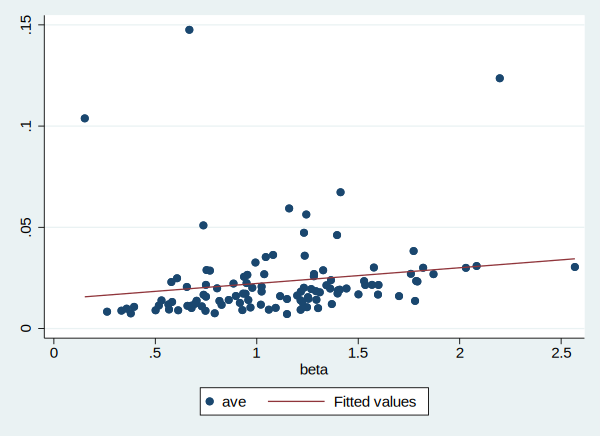

In [26]:
* plot the data and the linear fit of ave on beta
scatter ave beta || lfit ave beta